## 1. What is Reinforcement Learning?

Reinforcement Learning (RL) is a type of machine learning where:

- An **agent** interacts with an **environment**
- It takes **actions**
- Receives **rewards**
- Learns a **policy** to maximize total reward over time

Unlike supervised learning:
- There are no labeled correct answers
- The agent learns from consequences


## 2. Key RL Components

In our example:

- **Agent** → The turtle
- **Environment** → 5x5 Maze grid
- **State (s)** → Current position (x, y)
- **Action (a)** → Up, Down, Left, Right
- **Reward (R)** → 
  - +20 for reaching goal
  - -10 for hitting wall
  - -1 per step
- **Policy (π)** → Strategy for choosing actions
- **Goal** → Reach bottom-right cell


## 3. Q-Learning Update Rule

Q(s,a) ← Q(s,a) + α [ R + γ max Q(s',a') − Q(s,a) ]

Where:

- α → Learning rate
- γ → Discount factor
- R → Immediate reward
- max Q(s',a') → Best possible future reward

This equation updates our estimate of how good an action is.

In [63]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [64]:
GRID_SIZE = 5

GOAL = (4, 4)
WALLS = [(1,2), (2,2), (3,2)]

ACTIONS = ["UP", "DOWN", "LEFT", "RIGHT"]   # UP --> 0, DOWN --> 1, LEFT --> 2, RIGHT --> 3

In [65]:
def step(state, action):
    x, y = state

    if action == 0: y += 1
    elif action == 1: y -= 1
    elif action == 2: x -= 1
    elif action == 3: x += 1

    # Boundary check
    if x < 0 or x >= GRID_SIZE or y < 0 or y >= GRID_SIZE:
        return state, -10

    next_state = (x, y)

    if next_state in WALLS:
        return state, -10

    if next_state == GOAL:
        return next_state, 20

    return next_state, -1


In [66]:
q_table = np.zeros((GRID_SIZE, GRID_SIZE, 4))

In [67]:
EPISODES = 300
ALPHA = 0.1
GAMMA = 0.9 
EPSILON = 0.2

In [68]:
def choose_action(state):
    x, y = state
    
    if random.uniform(0,1) < EPSILON:
        return random.randint(0,3)  # explore
    else:
        return np.argmax(q_table[x,y])  # exploit


In [69]:
rewards_per_episode = []
for episode in range(EPISODES):

    state = (0,0)
    total_reward = 0

    for _ in range(100):

        action = choose_action(state)
        next_state, reward = step(state, action)

        x, y = state
        nx, ny = next_state

        best_next = np.max(q_table[nx, ny])

        q_table[x, y, action] += ALPHA * (
            reward + GAMMA * best_next - q_table[x, y, action]
        )

        state = next_state
        total_reward += reward

        if state == GOAL:
            break

    rewards_per_episode.append(total_reward)

print("Training finished!")

Training finished!


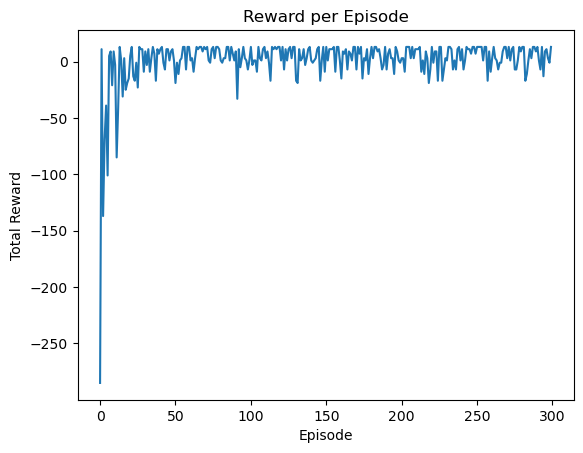

In [70]:
plt.plot(rewards_per_episode)
plt.title("Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.show()

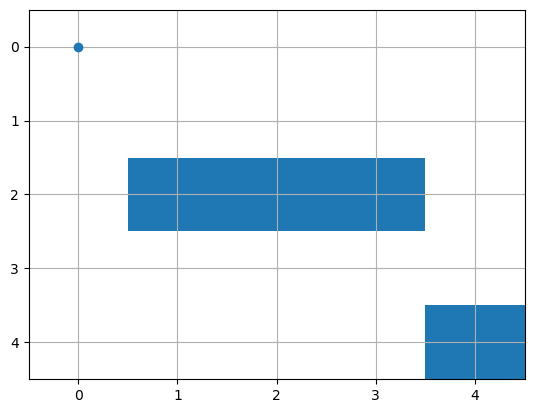

In [71]:
state = (0,0)
path = [state]

while state != GOAL:
    x, y = state
    action = np.argmax(q_table[x,y])
    state, _ = step(state, action)
    path.append(state)

fig, ax = plt.subplots()
ax.set_xlim(-0.5, GRID_SIZE-0.5)
ax.set_ylim(-0.5, GRID_SIZE-0.5)
ax.set_xticks(range(GRID_SIZE))
ax.set_yticks(range(GRID_SIZE))
ax.grid(True)

for wall in WALLS:
    ax.add_patch(plt.Rectangle((wall[0]-0.5, wall[1]-0.5), 1, 1))

ax.add_patch(plt.Rectangle((GOAL[0]-0.5, GOAL[1]-0.5), 1, 1))

agent_dot, = ax.plot([], [], marker="o")

def update(frame):
    x, y = path[frame]
    agent_dot.set_data([x], [y])
    return agent_dot,

ani = animation.FuncAnimation(
    fig,
    update,
    frames=len(path),
    interval=500,
    repeat=False
)

plt.gca().invert_yaxis()

HTML(ani.to_jshtml())